# 以TensorFlow张量运算仿真神经网络的运行

### 以TensorFlow张量（矩阵）运算仿真神经网络的运行

## 16.1 矩阵运算仿真神经网络


In [1]:
import tensorflow as tf

F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\ten

In [4]:
"""
正态分布的随机数 tf.random_normal
"""
ts_normal = tf.random_normal([1000])

with tf.Session() as ss:
    norm_data = ts_normal.eval()
    print(norm_data[:5])
    print(len(norm_data))
    

[-1.2197871   0.77829456 -2.0108018  -0.07075689  0.81475645]
1000


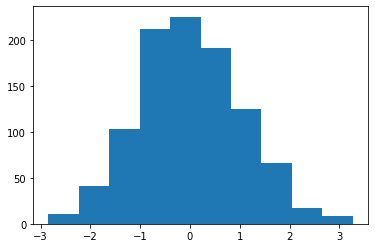

In [12]:
# 显示直方图
import matplotlib.pyplot as plt
plt.hist(norm_data)
plt.show()

## 16.2 以placeholder传入X的值

## 16.3 创建layer函数以矩阵运算仿真神经网络

### 神经网络其实就是以矩阵的运算来实现仿真，后续将以相同的方式来建立类神经网络的多层感知器，定义layer函数

In [14]:
"""
1. layer函数
创建下面的layer函数，其功能是建立两层神经网络。
"""
def layer(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W)+b
    
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

### 参数解释
- ### layer参数
    - #### output_dim: 输出的神经元数量
    - #### input_dim: 输入的神经元数量
    - #### inputs: 输入的二维数组 placeholder
    - #### acivation： 激活函数
- ### 以正态分布的随机数建立并且初始化W（权重）
- ### 以正态分布的随机数建立B（偏差）
- ### 建立矩阵表达式 XWb = (inputs×W) + b
- ### 设置activation激活函数
- ### 返回建立的神经网络层

In [15]:
"""
2. 使用layer函数建立3层类神经网络

以layer函数建立3层类神经网络，输入层有4个神经元，隐藏层有3个神经元，输出层有2个神经元
"""
X = tf.placeholder('float', [None, 4])
h = layer(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y = layer(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as ses:
    init = tf.global_variables_initializer()
    ses.run(init)
    X_array = [[0.4,0.2,0.4,0.5]]
    (layer_X, layer_h, layer_y) =ses.run((X, h, y), feed_dict={X: X_array})
    
    print('input Layer X: ');print(layer_X)
    print('hidden Layer h: '); print(layer_h)
    print('output Layer y: ');print(layer_y)

input Layer X: 
[[0.4 0.2 0.4 0.5]]
hidden Layer h: 
[[0.6120038  0.6514859  0.32273287]]
output Layer y: 
[[-0.37276685 -0.6398309 ]]


## 16.4 建立layer_debugger函数显示权重与偏差

In [16]:
"""
1. layer_debug函数
创建下面的layer函数，其功能是建立两层神经网络。
"""
def layer_debug(output_dim, input_dim, inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W)+b
    
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs,W,b

In [17]:
X = tf.placeholder('float', [None, 4])
h, W1, b1 = layer_debug(output_dim=3, input_dim=4, inputs=X, activation=tf.nn.relu)
y, W2, b2 = layer_debug(output_dim=2, input_dim=3, inputs=h)

with tf.Session() as ses:
    init = tf.global_variables_initializer()
    ses.run(init)
    X_array = [[0.4,0.2,0.4,0.5]]
    (layer_X, layer_h, layer_y, W1, b1, W2, b2) =ses.run((X, h, y, W1, b1, W2, b2), feed_dict={X: X_array})
    
    print('input Layer X: ');print(layer_X)
    print('W1: '); print(W1)
    print('b1: '); print(b1)
    print('hidden Layer h: '); print(layer_h)
    print('W2: '); print(W2)
    print('b2: '); print(b2)
    print('output Layer y: ');print(layer_y)

input Layer X: 
[[0.4 0.2 0.4 0.5]]
W1: 
[[-0.34356958  1.2257221  -0.29909852]
 [ 1.392562   -1.088177    0.79162246]
 [-0.05123042 -2.7557263   0.28963724]
 [-0.68746614 -1.9787539  -1.8302162 ]]
b1: 
[[ 1.1649603  0.2690359 -0.5653124]]
hidden Layer h: 
[[0.9418196 0.        0.       ]]
W2: 
[[ 1.1129116  -0.7450077 ]
 [-0.05862506 -0.04040814]
 [ 0.5331398  -1.5139902 ]]
b2: 
[[-1.2057776   0.22692391]]
output Layer y: 
[[-0.15761566 -0.47473893]]


### 执行结果详细说明如下：
![](./lesson16/1.jpg)
![](./lesson16/2.jpg)